<a href="https://colab.research.google.com/github/AidaCPL/INFOSCI301_Final_Project/blob/main/Code/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Algorithms and Explainable AI

In [ ]:
import pandas as pd

# Load the datasets
climate_fever_data = pd.read_csv('https://raw.githubusercontent.com/AidaCPL/INFOSCI301_Final_Project/refs/heads/main/Data/climate_fever.csv')
main_data = pd.read_csv('https://raw.githubusercontent.com/AidaCPL/INFOSCI301_Final_Project/refs/heads/main/Data/Main.csv')

In [ ]:
# Display basic information about the datasets
climate_fever_data_info = climate_fever_data.info()
main_data_info = main_data.info()

climate_fever_head = climate_fever_data.head()
main_data_head = main_data.head()

(climate_fever_data_info, main_data_info, climate_fever_head, main_data_head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7675 entries, 0 to 7674
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   claim_id        7675 non-null   int64  
 1   claim           7675 non-null   object 
 2   claim_label     7675 non-null   object 
 3   evidence_id     7675 non-null   object 
 4   evidence_label  7675 non-null   object 
 5   article         7675 non-null   object 
 6   evidence_text   7675 non-null   object 
 7   entropy         7675 non-null   float64
 8   votes           7675 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 539.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54757 entries, 0 to 54756
Columns: 101 entries, id to mobile
dtypes: float64(77), int64(21), object(3)
memory usage: 42.2+ MB


(None,
 None,
    claim_id                                              claim claim_label  \
 0         0  Global warming is driving polar bears toward e...    SUPPORTS   
 1         0  Global warming is driving polar bears toward e...    SUPPORTS   
 2         0  Global warming is driving polar bears toward e...    SUPPORTS   
 3         0  Global warming is driving polar bears toward e...    SUPPORTS   
 4         0  Global warming is driving polar bears toward e...    SUPPORTS   
 
                                evidence_id   evidence_label  \
 0  Extinction risk from global warming:170  NOT_ENOUGH_INFO   
 1                        Global warming:14         SUPPORTS   
 2                       Global warming:178  NOT_ENOUGH_INFO   
 3                   Habitat destruction:61         SUPPORTS   
 4                          Polar bear:1328  NOT_ENOUGH_INFO   
 
                                article  \
 0  Extinction risk from global warming   
 1                       Global warmin

## Train Random Forest

In [ ]:
# Load datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
# Data Preparation
# Selecting user features and target
features = ['urbanrural', 'CRT', 'Edu', 'vaccine1', 'believe', 'age', 'Minority', 'fb',
            'tw', 'sn', 'ig', 'wh', 'ti', 'ot', 'no']
target = 'claim_label' # Binary

# Ensure numeric encoding of target variable for modeling
label_mapping = {'SUPPORTS': 1, 'REFUTES': 0}
climate_fever_data['claim_label_encoded'] = climate_fever_data['claim_label'].map(label_mapping)

# Merge datasets (simplified alignment by index truncation)
min_length = min(len(main_data), len(climate_fever_data))
main_data_trimmed = main_data.iloc[:min_length]
climate_fever_trimmed = climate_fever_data.iloc[:min_length]

# Combine features with claim labels
merged_data = pd.concat([main_data_trimmed[features], climate_fever_trimmed[['claim_label_encoded']]], axis=1)
merged_data = merged_data.dropna()  # Drop rows with missing data

# Split data
X = merged_data[features]
y = merged_data['claim_label_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

              precision    recall  f1-score   support

         0.0       0.40      0.12      0.18       250
         1.0       0.74      0.93      0.82       661

    accuracy                           0.71       911
   macro avg       0.57      0.52      0.50       911
weighted avg       0.64      0.71      0.65       911



<ipython-input-6-2862118a7c70>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


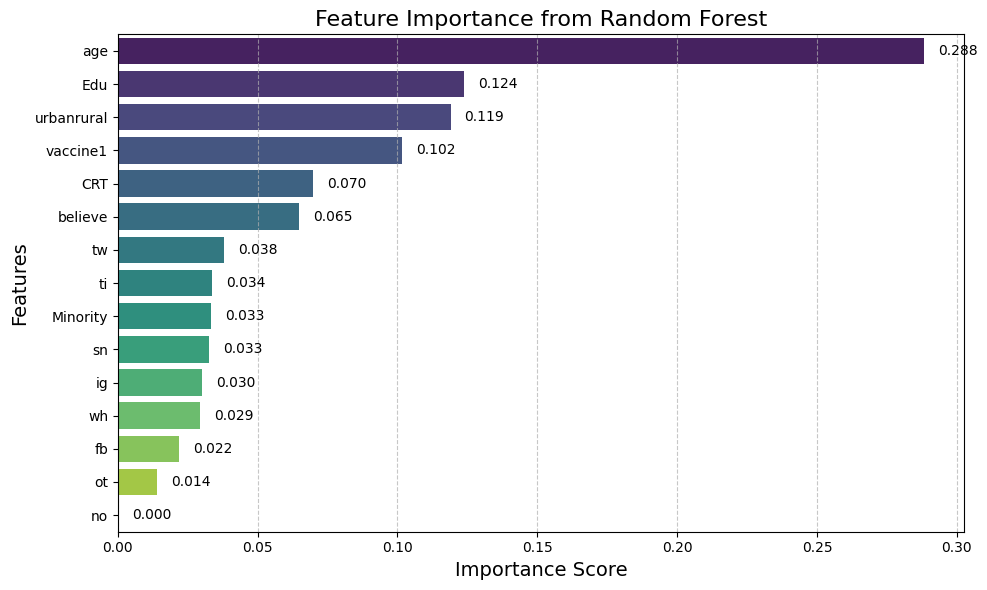

In [ ]:
# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the Model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Feature Importance
importances = model.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importances,
    palette='viridis'
)

# Add value annotations
for i, v in enumerate(feature_importances['Importance']):
    plt.text(v + 0.005, i, f"{v:.3f}", color='black', va='center')

# Styling the plot
plt.title('Feature Importance from Random Forest', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
import shap
import matplotlib.pyplot as plt

# Create a SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

In [ ]:
# Correct extraction of SHAP values for a single class
shap_values_single_class = shap_values[1]  # This should give us shape (911, 15)
print("Corrected shape of shap_values_single_class:", shap_values_single_class.shape)

Corrected shape of shap_values_single_class: (15, 2)
